In [1]:
# Solved in 4000 steps, 2560 episodes

In [2]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import ContinuosActorCritic
from src.networks import ActorCriticNetwork
from src.policies import GaussianPolicy
from src.experience import ExperienceSorceDiscountedSteps

GAMMA = 0.99
LEARNING_RATE = 0.0001
ENTROPY_BETA = 0.01
N_STEPS = 4
BATCH_SIZE = 32

CHECKPOINT_PATH = os.path.join("models", "05_pendulum_ac.tar")


env = gym.make("Pendulum-v0")
test_env = gym.make("Pendulum-v0")
device = torch.device("cpu")
net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = ContinuosActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [3]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [4]:
agent.policy = GaussianPolicy(agent.net, agent.env, agent.device)
agent.test_policy = GaussianPolicy(agent.net, agent.test_env, agent.device, test=True)
agent.exp_train_source = ExperienceSorceDiscountedSteps(
    env=agent.env,
    policy=agent.policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source = ExperienceSorceDiscountedSteps(
    env=agent.test_env,
    policy=agent.test_policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source.render = True

In [5]:
random_net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)
random_policy = GaussianPolicy(random_net, env, device)
exp_random_source = ExperienceSorceDiscountedSteps(test_env, random_policy, gamma=GAMMA, n_steps=N_STEPS, steps=BATCH_SIZE)

In [6]:
exp_random_source.render = True
exp_random_source.play_episode()
test_env.close()

In [23]:
agent.learn(4000, verbose_every=100)
# agent.plot_performance()

 10%|█         | 102/1000 [00:07<01:05, 13.79it/s]
 3100: loss=-0.104318,  mean reward=-784.60,  steps/ep=200,  episodes=1984
 20%|██        | 202/1000 [00:14<00:58, 13.69it/s]
 3200: loss=0.619376,  mean reward=-827.33,  steps/ep=200,  episodes=2048
 30%|███       | 302/1000 [00:23<01:08, 10.20it/s]
 3300: loss=-0.137121,  mean reward=-854.88,  steps/ep=200,  episodes=2112
 40%|████      | 402/1000 [00:30<00:44, 13.46it/s]
 3400: loss=0.633671,  mean reward=-782.39,  steps/ep=200,  episodes=2176
 50%|█████     | 500/1000 [00:38<00:39, 12.76it/s]
 3500: loss=0.463974,  mean reward=-894.73,  steps/ep=200,  episodes=2240
 60%|██████    | 601/1000 [00:47<00:29, 13.36it/s]
 3600: loss=0.335623,  mean reward=-863.10,  steps/ep=200,  episodes=2304
 70%|███████   | 701/1000 [00:55<00:22, 13.17it/s]
 3700: loss=0.378840,  mean reward=-623.16,  steps/ep=200,  episodes=2368
 80%|████████  | 801/1000 [01:03<00:18, 10.79it/s]
 3800: loss=1.309374,  mean reward=-537.71,  steps/ep=200,  episodes=243

In [24]:
agent.exp_train_source.render = True
agent.exp_train_source.play_episode()
env.close()
agent.exp_train_source.render = False

In [29]:
agent.test(num_episodes=10)
test_env.close()

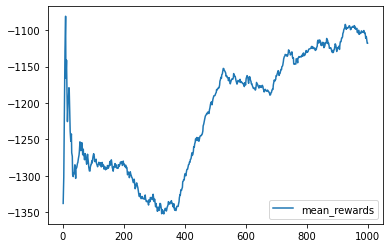

In [10]:
agent.plot_performance(['mean_rewards'])

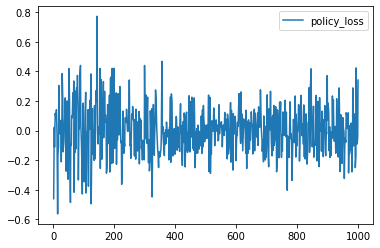

In [11]:
agent.plot_performance(['policy_loss'])

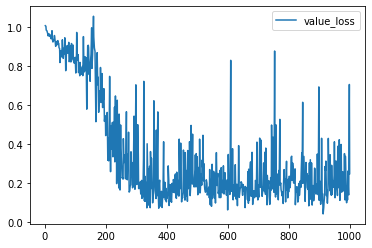

In [12]:
agent.plot_performance(['value_loss'])


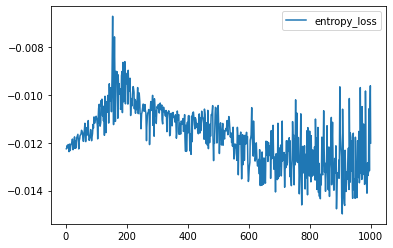

In [13]:
agent.plot_performance(['entropy_loss'])


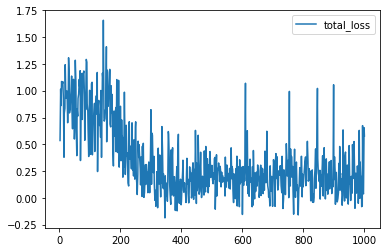

In [14]:
agent.plot_performance(['total_loss'])
